# read ascii mask files from NODC and make some regional aggregations

Mask files downloaded from:
   https://www.nodc.noaa.gov/OC5/woa13/masks13.html
   
Documentation found here: https://data.nodc.noaa.gov/woa/WOA13/DOC/woa13documentation.pdf

In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import csv
import grid_tools
import os

import matplotlib.pyplot as plt
from collections import OrderedDict

#dataroot = '/glade/p/ncgd0033/obs'
dataroot = '/project/oce/mclong'

### make a grid
use `grid_tools` function to generate a lat/lon grid corresponding to WOA

In [2]:
nx = 360
ny = 180
grid = grid_tools.generate_latlon_grid(nx=nx,ny=ny,lon0=-180.)
grid

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, nv: 4)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
Dimensions without coordinates: nv
Data variables:
    xc       (lat, lon) float64 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 ...
    yc       (lat, lon) float64 -89.5 -89.5 -89.5 -89.5 -89.5 -89.5 -89.5 ...
    xv       (lat, lon, nv) float64 -180.0 -179.0 -179.0 -180.0 -179.0 ...
    yv       (lat, lon, nv) float64 -90.0 -90.0 -89.0 -89.0 -90.0 -90.0 ...
    area     (lat, lon) float64 1.079e+08 1.079e+08 1.079e+08 1.079e+08 ...

### add arrays to read from mask file

In [3]:
ds = grid.copy()
ds = ds.drop([k for k in grid if k not in ['lat','lon','area']])
ds['mask'] = xr.DataArray(np.zeros(ds.area.shape).astype(int),dims=('lat','lon'))
ds['kmt'] = xr.DataArray(np.zeros(ds.area.shape).astype(int),dims=('lat','lon'))
ds

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
Data variables:
    area     (lat, lon) float64 1.079e+08 1.079e+08 1.079e+08 1.079e+08 ...
    mask     (lat, lon) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    kmt      (lat, lon) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...

### read the ascii files

In [4]:
#--- basin mask
# The basin_XX.msk contains the basin code number defined for each grid square at each
# standard depth from the surface to 5500m. Each basin is identified by a code number that
# ranges from 1 to 58. The basin code number in a given quarter-degree and one-degree square
# may change with increased depth level. Appendix 1 lists the geographic basin names, the
# code number associated with each basin, and the standard depth level at which the given
# basin is first encountered.

lat_ndx = 0
lon_ndx = 1
mask_ndx = 2

csvfile = os.path.join(dataroot,'woa2013v2/1x1d/basinmask_01.msk')
with open(csvfile,'rb') as f:
    csvdata = csv.reader(f, delimiter=',',skipinitialspace=True)

    for ir,row in enumerate(csvdata):
        if ir < 2:
            print row
        else:
            j = np.where(grid.lat == float(row[lat_ndx]))[0]
            i = np.where(grid.lon == float(row[lon_ndx]))[0]
            if len(j) == 0 or len(i) == 0:
                print('ERROR: no match')
                break
            ds.mask.values[j,i] = int(row[mask_ndx])

            
#--- land sea mask
# The landsea_XX.msk contains the standard depth level number at which the bottom of the
# ocean is first encountered at each quarter-degree or one-degree square for the entire world.
# Land will have a value of 1

lat_ndx = 0
lon_ndx = 1
mask_ndx = 2

csvfile = os.path.join(dataroot,'woa2013v2/1x1d/landsea_01.msk')
with open(csvfile,'rb') as f:
    csvdata = csv.reader(f, delimiter=',',skipinitialspace=True)

    for ir,row in enumerate(csvdata):
        if ir < 2:
            print row
        else:
            j = np.where(grid.lat == float(row[lat_ndx]))[0]
            i = np.where(grid.lon == float(row[lon_ndx]))[0]
            ds.kmt.values[j,i] = int(row[mask_ndx])            

ds            

['#Basin number for WOA climatology objective analysis : 1.00 degree grid']
['Latitude', 'Longitude', 'Basin_0m', 'Basin_5m', 'Basin_10m', 'Basin_15m', 'Basin_20m', 'Basin_25m', 'Basin_30m', 'Basin_35m', 'Basin_40m', 'Basin_45m', 'Basin_50m', 'Basin_55m', 'Basin_60m', 'Basin_65m', 'Basin_70m', 'Basin_75m', 'Basin_80m', 'Basin_85m', 'Basin_90m', 'Basin_95m', 'Basin_100m', 'Basin_125m', 'Basin_150m', 'Basin_175m', 'Basin_200m', 'Basin_225m', 'Basin_250m', 'Basin_275m', 'Basin_300m', 'Basin_325m', 'Basin_350m', 'Basin_375m', 'Basin_400m', 'Basin_425m', 'Basin_450m', 'Basin_475m', 'Basin_500m', 'Basin_550m', 'Basin_600m', 'Basin_650m', 'Basin_700m', 'Basin_750m', 'Basin_800m', 'Basin_850m', 'Basin_900m', 'Basin_950m', 'Basin_1000m', 'Basin_1050m', 'Basin_1100m', 'Basin_1150m', 'Basin_1200m', 'Basin_1250m', 'Basin_1300m', 'Basin_1350m', 'Basin_1400m', 'Basin_1450m', 'Basin_1500m', 'Basin_1550m', 'Basin_1600m', 'Basin_1650m', 'Basin_1700m', 'Basin_1750m', 'Basin_1800m', 'Basin_1850m', 'Basin

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
Data variables:
    area     (lat, lon) float64 1.079e+08 1.079e+08 1.079e+08 1.079e+08 ...
    mask     (lat, lon) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    kmt      (lat, lon) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...

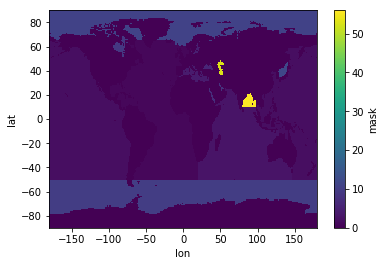

In [5]:
ds.mask.plot()

### aggregate regions 

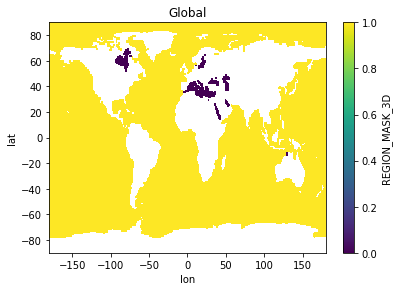

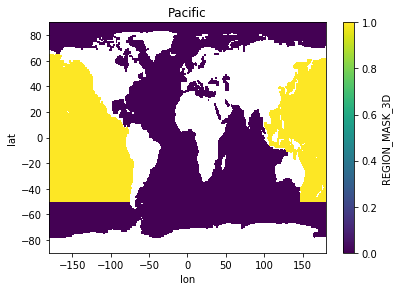

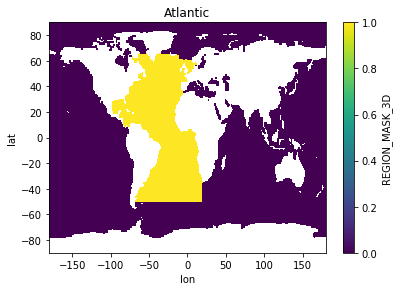

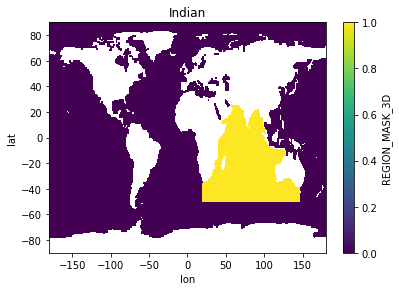

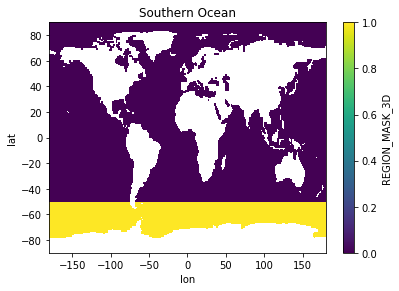

In [6]:
my_regions = OrderedDict([('Global' , [1.,2.,3.,10.,12.,56.,11.]),
                          ('Pacific' , [2.,12.]),
                          ('Atlantic' , [1.]),
                          ('Indian' , [3.,56.]),
                          ('Southern Ocean' , [10.])])

nlat = len(ds.lat)
nlon = len(ds.lon)
nrgn = len(my_regions)

dso = ds.copy()
dso['REGION_MASK_3D'] = xr.DataArray(np.zeros((nrgn,nlat,nlon)),
                                    dims=('region','lat','lon'))
dso['region_names'] = xr.DataArray(my_regions.keys(),
                                    dims=('region'))

for i,ndx in enumerate(my_regions.values()):
    tmp = np.zeros((nlat,nlon))
    for n in ndx:
        tmp = np.where(ds.mask.values == n, 1, tmp)
    dso.REGION_MASK_3D.values[i,:,:] = tmp
    dso.REGION_MASK_3D.values = dso.REGION_MASK_3D.where(ds.kmt!=1)

for i in range(nrgn):
    fig = plt.figure()
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    dso.REGION_MASK_3D[i,:,:].plot(axes=ax)
    ax.set_title(my_regions.keys()[i])

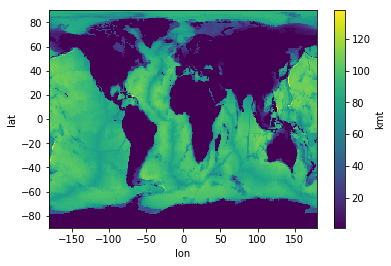

In [7]:
ds.kmt.plot()

In [8]:
file_out = os.path.join(dataroot,'woa2013v2/1x1d/woa_region_mask.nc')
dso.to_netcdf(file_out)